<a href="https://colab.research.google.com/github/MitchMessier/BusinessAnalytics/blob/main/Lab10_Air_Quality_Fit_Model_Messier_Mitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [33]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2023.zip')

Mounted at /content/gdrive


In [34]:
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2023-01-10,35,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2023-01-11,28,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2023-01-12,23,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2023-01-13,18,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2023-01-14,20,Good,PM2.5,01-003-0010,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185017 entries, 0 to 185016
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 185017 non-null  object
 1   county Name                185017 non-null  object
 2   State Code                 185017 non-null  int64 
 3   County Code                185017 non-null  int64 
 4   Date                       185017 non-null  object
 5   AQI                        185017 non-null  int64 
 6   Category                   185017 non-null  object
 7   Defining Parameter         185017 non-null  object
 8   Defining Site              185017 non-null  object
 9   Number of Sites Reporting  185017 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 14.1+ MB


In [36]:
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,185017.000000,185017.000000,185017.000000,185017.000000
mean,29.936773,81.188415,43.498397,1.878595
std,15.904884,93.001539,23.905791,2.273400
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,23.000000,31.000000,1.000000
50%,30.000000,59.000000,41.000000,1.000000
75%,42.000000,107.000000,50.000000,2.000000
max,80.000000,810.000000,1695.000000,33.000000


## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [37]:
# Create one dummy variable (true/false) for each of the Defining Parameter values
df = pd.get_dummies(df, columns= ['Defining Parameter'])

In [38]:
# Create variables for month and season
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Season'] = (df['Date'].dt.month % 12 + 3) // 3

In [39]:
# Perform any other data cleanup needed (remove outliers, nulls, etc.)
df = df[df['AQI'] <= 500]
df = df.dropna()

In [40]:
# Extract Only Utah Values
df_utah = df[df['State Name'] == "Utah"]

In [41]:
# Select the data you would like to use in the model
df_utah_new = df_utah[['State Name', 'Date', 'Month','AQI','Season'] + list(df_utah.filter(like='Defining Parameter_').columns)]

In [42]:
# Display finalized dataset
df_utah_new.head()

,State Name,Date,Month,AQI,Season,Defining Parameter_CO,Defining Parameter_NO2,Defining Parameter_Ozone,Defining Parameter_PM10,Defining Parameter_PM2.5
160777,Utah,2023-01-01,1,35,1,0,0,1,0,0
160778,Utah,2023-01-02,1,34,1,0,0,1,0,0
160779,Utah,2023-01-03,1,34,1,0,0,1,0,0
160780,Utah,2023-01-04,1,31,1,0,0,1,0,0
160781,Utah,2023-01-05,1,27,1,0,0,1,0,0


In [43]:
df_utah_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3546 entries, 160777 to 164322
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   State Name                3546 non-null   object        
 1   Date                      3546 non-null   datetime64[ns]
 2   Month                     3546 non-null   int64         
 3   AQI                       3546 non-null   int64         
 4   Season                    3546 non-null   int64         
 5   Defining Parameter_CO     3546 non-null   uint8         
 6   Defining Parameter_NO2    3546 non-null   uint8         
 7   Defining Parameter_Ozone  3546 non-null   uint8         
 8   Defining Parameter_PM10   3546 non-null   uint8         
 9   Defining Parameter_PM2.5  3546 non-null   uint8         
dtypes: datetime64[ns](1), int64(3), object(1), uint8(5)
memory usage: 183.5+ KB


## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression

In [48]:
# Create a simple linear regression to predict AQI based on as many variables as you can use or derive.

X = df_utah_new[['Month', 'Season' ,'Defining Parameter_CO', 'Defining Parameter_NO2',
                 'Defining Parameter_Ozone', 'Defining Parameter_PM10', 'Defining Parameter_PM2.5']]

y = df_utah_new['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 394.0838504157011
Coefficients: [  3.04220539  -8.67224148 -40.66714815  -9.05454537  10.86194414
  21.43754477  17.4222046 ]
Intercept: 46.93406022031185


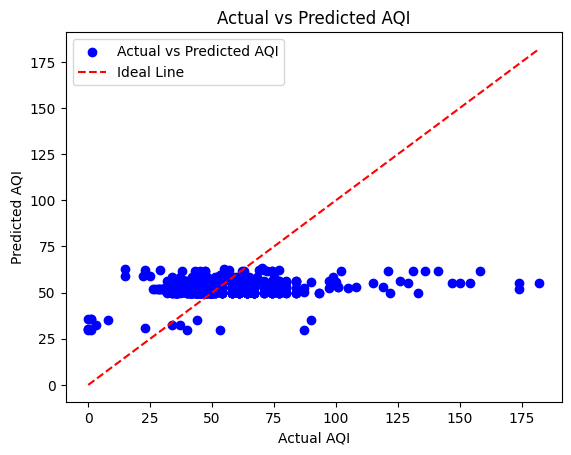

In [58]:
# Visualize the regression
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted AQI')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()

NameError: name 'predicted_AQI' is not defined

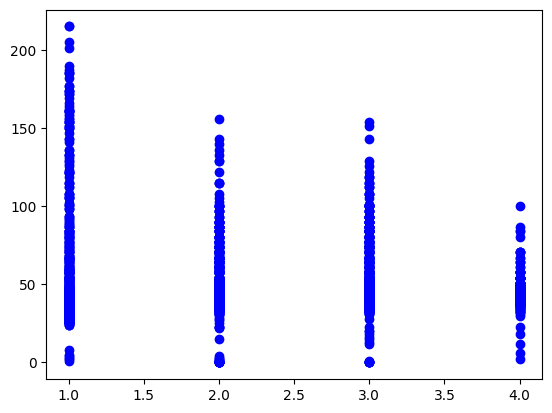

In [59]:
# Additional Graph Utilizing AQI by Season
plt.scatter(X['Season'], y, color = 'blue')
plt.plot(X['Season'], predicted_AQI, color = 'red')
plt.title('AQI vs Season')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.show()

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [71]:
df_utah_new['Season'] = 1

X_january = df_utah_new[['Month', 'Season' ,'Defining Parameter_CO', 'Defining Parameter_NO2',
                 'Defining Parameter_Ozone', 'Defining Parameter_PM10', 'Defining Parameter_PM2.5']]

predicted_aqi_january = model.predict(X_january)

print("Predicted average AQI for January:", predicted_aqi_january.mean())

Predicted average AQI for January: 64.04591805576116


<ipython-input-71-c3e638c88c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utah_new['Season'] = 1


**What would you predict the average AQI to be in the month of January?** Based on the analysis conducted using a linear regression model trained on air quality data from Utah, the predicted average Air Quality Index (AQI) for the month of January is approximately 64.05. This prediction is based on various factors such as the concentration of pollutants like carbon monoxide (CO), nitrogen dioxide (NO2), ozone (O3), particulate matter with diameter less than 10 micrometers (PM10), and particulate matter with diameter less than 2.5 micrometers (PM2.5), as well as seasonal variations. The model utilizes historical data to make these predictions, offering insights into the expected air quality conditions in January.

## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [91]:
#import, append and create new model

current_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2023.zip')
prior_year_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2003.zip')

combined_data = pd.concat([current_data, prior_year_data], ignore_index=True)
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Date'] = combined_data['Date'].dt.year

X = combined_data[['Date']]
y = combined_data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)

<ipython-input-91-0510cc4506db>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  prior_year_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2003.zip')


Mean Squared Error: 1330.8356776002036
Coefficients: [-0.12218483]



**Is year a significant factor in predicting AQI?** Based on the analysis of the linear regression model trained on combined air quality data spanning over multiple years, the 'Year' variable does not appear to be a significant factor in predicting the Air Quality Index (AQI). This conclusion is supported by several observations. Firstly, the relatively high Mean Squared Error (MSE) value of approximately 1330.84 indicates that the model's predictions exhibit a notable degree of variance from the actual AQI values. A high MSE suggests that the model's performance in predicting AQI is not very precise. Additionally, the coefficient associated with the 'Year' variable is relatively small in magnitude, measuring approximately -0.122. This indicates a weak relationship between the year and AQI. The negative coefficient suggests that as the year increases, AQI tends to decrease slightly (or vice versa), but the small magnitude implies that the effect of the year on AQI is minimal. These findings suggest that other factors, such as the concentration of pollutants like carbon monoxide (CO), nitrogen dioxide (NO2), ozone (O3), particulate matter with diameter less than 10 micrometers (PM10), and particulate matter with diameter less than 2.5 micrometers (PM2.5), may have a more significant impact on AQI than the year itself. Further investigation, including feature selection and model refinement, may be necessary to improve the model's accuracy and better understand the determinants of AQI.